# Objective 

The given dataset is related to Indian patients who have been tested for a liver disease. Based on chemical compounds (bilrubin,albumin,protiens,alkaline phosphatase) present in human body and tests like SGOT, SGPT the outcome mentioned is whether person is a patient i.e, whether he needs to be diagnosed further or not. Perform data cleansing, and required transformations and build a predictive model which will be able to predict most of the cases accurately.

In [1]:
# import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)

In [3]:
# Importing the dataset
data = pd.read_csv('IndianLiverPatientData.txt',delimiter='\t',index_col=0,header=None)


#### In this dataset we do not have column heades given

In [4]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


#### Providing column headers 

In [5]:
data.columns =['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase',
'Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin',
'Albumin_and_Globulin_Ratio','Class']


In [6]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,,,,,,,,,,,
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


In [7]:
print(data.shape)

(583, 11)


In [8]:
print(data.dtypes)

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Class                          object
dtype: object


In [9]:
print(data.describe())

              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      568.000000   
mean                  80.713551                  109.910806        6.483979   
std                  182.620356                  288.918529 

#### We can see that in some variables, there are some missing values. We need to take care of those missing values

#### In this dataset we do not have more than 15% values missing. Hence we will just treat these variables.

In [10]:
total = data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(5)

,Total,Percent
Gender,20,0.034305
Total_Protiens,15,0.025729
Albumin_and_Globulin_Ratio,4,0.006861
Class,0,0.000000
Albumin,0,0.000000


#### Treating missing values

In [11]:
# handling missing values in Gender column
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [12]:
# handling missing values in data Total_Protiens column
data['Albumin_and_Globulin_Ratio'].fillna(np.mean(data['Albumin_and_Globulin_Ratio']),inplace=True)

In [13]:
# handling missing values in data Total_Protiens column
data['Total_Protiens'].fillna(np.mean(data['Total_Protiens']),inplace=True)

In [14]:
total = data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(5)

,Total,Percent
Class,0,0.0
Albumin_and_Globulin_Ratio,0,0.0
Albumin,0,0.0
Total_Protiens,0,0.0
Aspartate_Aminotransferase,0,0.0


### Since this is a Medical Dataset, and datapoints are clusters together. So, instead of treating these variable, we are going to keep these variables as it is.

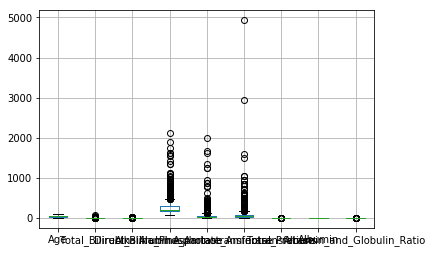

In [15]:
data.boxplot()

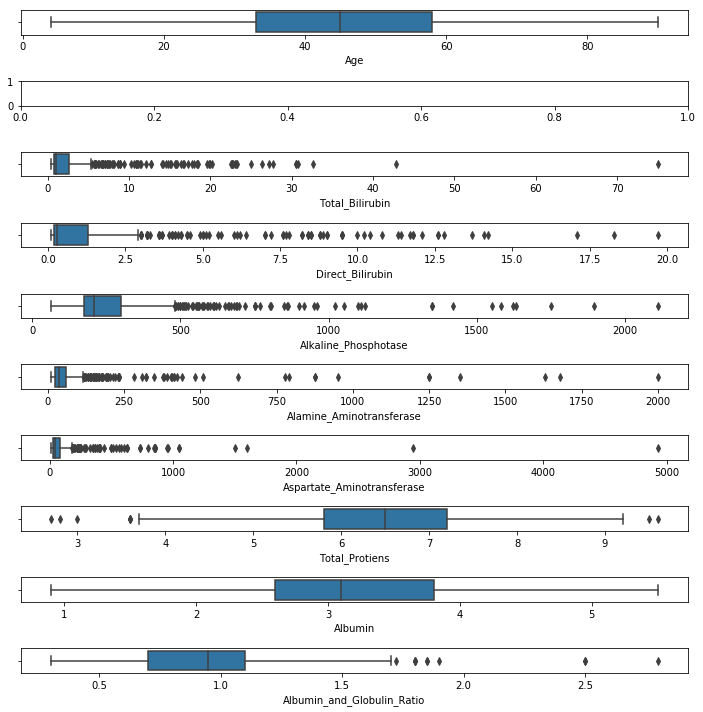

In [16]:
fig, axs = plt.subplots(10,figsize=(10,10))
plt1 = sns.boxplot(data['Age'], ax = axs[0])
#plt2 = sns.boxplot(data['Gender'],ax=axs[1])
plt3 = sns.boxplot(data['Total_Bilirubin'],ax=axs[2])
plt4 = sns.boxplot(data['Direct_Bilirubin'],ax=axs[3])
plt5 = sns.boxplot(data['Alkaline_Phosphotase'],ax=axs[4])
plt6 = sns.boxplot(data['Alamine_Aminotransferase'],ax=axs[5])
plt7 = sns.boxplot(data['Aspartate_Aminotransferase'],ax=axs[6])
plt8 = sns.boxplot(data['Total_Protiens'],ax=axs[7])
plt9 = sns.boxplot(data['Albumin'],ax=axs[8])
plt10 = sns.boxplot(data['Albumin_and_Globulin_Ratio'],ax=axs[9])

plt.tight_layout()
plt.show()

### Saperating Features and Labels

In [17]:
X = data[['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase',
'Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin',
'Albumin_and_Globulin_Ratio']]
y = data[['Class']]

In [18]:
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,,,,,,,,,,
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


In [19]:
y.head()

,Class
0,
1,No
2,No
3,No
4,No
5,No


### Changing categorical variables from character to numeric

In [20]:
X=pd.get_dummies(X)

In [21]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,,,,,,,,,,,
1,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
2,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
3,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
4,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
5,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


In [22]:
# Avoiding Dummy Variable Trap
X=X.drop('Gender_Female',axis=1)

In [23]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
0,,,,,,,,,,
1,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0
2,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
3,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
4,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
5,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [25]:
X_train.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
0,,,,,,,,,,
214,8,0.9,0.2,401,25,58,7.5,3.4,0.80,0
533,62,0.7,0.2,162,12,17,8.2,3.2,0.60,1
362,65,0.7,0.2,182,23,28,6.8,2.9,0.70,0
444,42,0.7,0.2,152,35,81,6.2,3.2,1.06,0
400,27,1.0,0.2,205,137,145,6.0,3.0,1.00,1


In [26]:
y_train.head()

,Class
0,
214,No
533,Yes
362,Yes
444,No
400,No


In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-2.27249983 -0.36378907 -0.43791717 ...  0.30893012 -0.47366869
  -1.68325082]
 [ 1.07831565 -0.39459834 -0.43791717 ...  0.06235028 -1.09210172
   0.59408853]
 [ 1.26447207 -0.39459834 -0.43791717 ... -0.30751948 -0.7828852
  -1.68325082]
 ...
 [ 1.51268062 -0.37919371 -0.43791717 ...  2.1582789   1.38163038
  -1.68325082]
 [ 0.95421138 -0.14812419 -0.29660663 ...  0.43222004  0.45398084
   0.59408853]
 [-1.15556134  6.09075264  6.45097183 ... -0.67738923 -1.40131823
   0.59408853]]


---

# Decision Tree

In [28]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [29]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)

[[82 18]
 [22 24]]
Classification report
              precision    recall  f1-score   support

          No       0.79      0.82      0.80       100
         Yes       0.57      0.52      0.55        46

   micro avg       0.73      0.73      0.73       146
   macro avg       0.68      0.67      0.67       146
weighted avg       0.72      0.73      0.72       146

Accuracy of the model: 0.726027397260274


---

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 400, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)

[[85 15]
 [33 13]]
Classification report
              precision    recall  f1-score   support

          No       0.72      0.85      0.78       100
         Yes       0.46      0.28      0.35        46

   micro avg       0.67      0.67      0.67       146
   macro avg       0.59      0.57      0.57       146
weighted avg       0.64      0.67      0.64       146

Accuracy of the model: 0.6712328767123288


---

# Kernel Svm

In [34]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma=0.1,C=1.0,random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)

[[100   0]
 [ 46   0]]
Classification report
              precision    recall  f1-score   support

          No       0.68      1.00      0.81       100
         Yes       0.00      0.00      0.00        46

   micro avg       0.68      0.68      0.68       146
   macro avg       0.34      0.50      0.41       146
weighted avg       0.47      0.68      0.56       146

Accuracy of the model: 0.684931506849315


---

# Logistic Regressioin

In [37]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)

[[93  7]
 [38  8]]
Classification report
              precision    recall  f1-score   support

          No       0.71      0.93      0.81       100
         Yes       0.53      0.17      0.26        46

   micro avg       0.69      0.69      0.69       146
   macro avg       0.62      0.55      0.53       146
weighted avg       0.65      0.69      0.63       146

Accuracy of the model: 0.6917808219178082


---

# Cross Validation using SVM

In [40]:
#Using cross validation

from sklearn import svm

classifier=(svm.SVC(kernel='rbf',gamma=0.001,C=10))

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=y_train, cv=kfold_cv)
print(kfold_cv_result)

#finding the mean
print(kfold_cv_result.mean())

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], y_train.iloc[train_value]).predict(X_train[test_value])


y_pred=classifier.predict(X_test)

KFold(n_splits=10, random_state=None, shuffle=False)
[0.77272727 0.75       0.81818182 0.63636364 0.77272727 0.63636364
 0.70454545 0.65116279 0.74418605 0.74418605]
0.7230443974630021


In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)

[[100   0]
 [ 46   0]]
Classification report
              precision    recall  f1-score   support

          No       0.68      1.00      0.81       100
         Yes       0.00      0.00      0.00        46

   micro avg       0.68      0.68      0.68       146
   macro avg       0.34      0.50      0.41       146
weighted avg       0.47      0.68      0.56       146

Accuracy of the model: 0.684931506849315


# Cross Validation using Logistic Regression 

In [44]:
#Using cross validation
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()


#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=y_train, cv=kfold_cv)
print(kfold_cv_result)

#finding the mean
print(kfold_cv_result.mean())

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train.iloc[train_value], y_train.iloc[train_value]).predict(X_train.iloc[test_value])



Y_pred=classifier.predict(X_test)




KFold(n_splits=10, random_state=None, shuffle=False)
[0.72727273 0.70454545 0.81818182 0.68181818 0.81818182 0.68181818
 0.70454545 0.62790698 0.81395349 0.72093023]
0.7299154334038054


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

## Conclusion

#### Initially we created the model using `Decision Tree` algorithm.
- Accuracy of the model is around **0.6712328**

#### To increase the accuracy of this model, we tried implementing `Random Forest` using 500 trees.
- Accuracy of this model is **0.671232**

#### `Kernel SVM` should have produced good accuarcy model. But it is completely misclassifying `class 0`. Also, `SVM using cross validation` increases model accuracy than only SVM model. 
- Accuracy of SVM model is **0.6849**
- Accuracy of SVM model using cross validation is **0.68493** 

#### `Logistic Regression` does not improve the accuracy as much. We implemented Logistic regression using cros validation as well, it increases the accuracy of the model little bit.
- Accuracy of this model is **0.6917**
- Accuracy of Logistic Regression Using Cross validation is **0.72991**


### Here we saw that, `Decision Tree` model produces good accuracy without cross validation and any hyperparameter tuning. Hence, we are going to select `Decision Tree` model for creating predictive model.
